In [1]:
from pcg_gazebo.generators import WorldGenerator
from pcg_gazebo.visualization import plot_workspace

world_gen = WorldGenerator()

Add a box generator to the list of assets

In [2]:
world_gen.add_asset(
    tag='box',
    description=dict(
        type='box',
        args=dict(
            size="10 * __import__('numpy').random.random(3)",
            name='cuboid',
            mass="max(0.1, __import__('numpy').random.random())",
            color='xkcd'
        )
    )
)

# Check if models where included correctly
print('Assets available for world generation=', world_gen.assets.tags)

Assets available for world generation= ['box', 'cardboard_box', 'arm_part', 'euro_pallet', 'walls', 'speed_limit_sign', 'mobile_base', 'OrangeDoors', 'sun', 'ground_plane', 'hinged_door']


Add a constraint to ensure all boxes are placed on top of ground plane

In [3]:
world_gen.add_constraint(
    name='tangent_to_ground_plane',
    type='tangent',
    frame='world',
    reference=dict(
        type='plane',
        args=dict(
            origin=[0, 0, 0],
            normal=[0, 0, 1]
        )
    )
)

print('List of constraints=', list(world_gen.constraints.tags))

List of constraints= ['tangent_to_ground_plane']


Add 2D workspace constraint defining where the boxes should be spawned in the world

List of constraints= ['tangent_to_ground_plane', 'boxes_workspace']


(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcc14425048>)

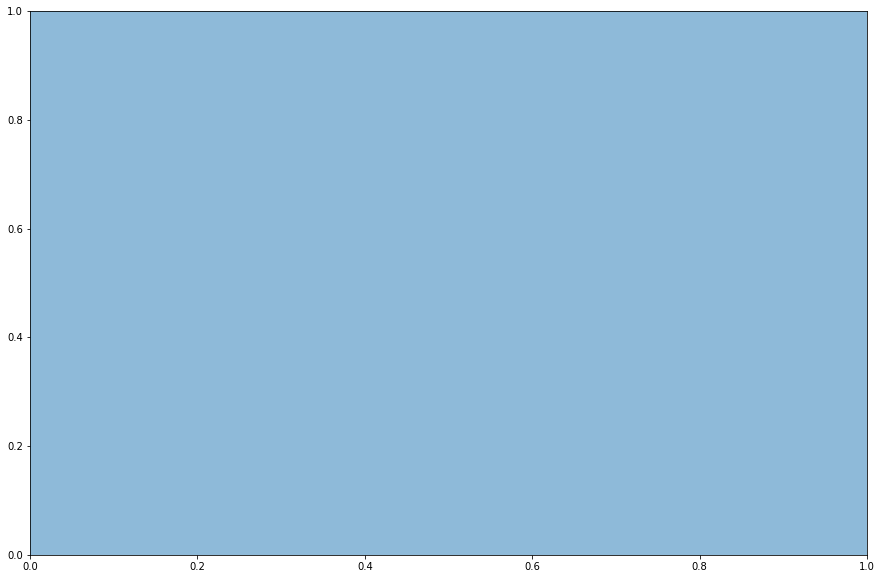

In [4]:
world_gen.add_constraint(
    name='boxes_workspace',
    type='workspace',
    frame='world',
    geometry=dict(
        type='area',
        description=dict(
            points=[
                [-15, -15, 0],
                [-15, 15, 0],
                [15, 15, 0],
                [15, -15, 0],
            ]
        )
    )
)

print('List of constraints=', list(world_gen.constraints.tags))

plot_workspace(workspace=world_gen.constraints.get('boxes_workspace'))

Add ground plane and the sun

In [5]:
world_gen.add_engine(
    engine_name='fixed_pose',
    tag='gp_engine',
    models=['ground_plane'],
    poses=[[0 for _ in range(6)]])
world_gen.set_model_as_ground_plane('ground_plane')
world_gen.add_engine(
    engine_name='fixed_pose',
    tag='sun_engine',
    models=['sun'],
    poses=[[0, 0, 10, 0, 0, 0]])

Add a random pose engine to place the boxes in the world

In [6]:
NUM_BOXES = 20

box_placement_policy = dict(
    models=['box'],
    config=[
        dict(
            dofs=['x', 'y'],
            policy=dict(
                name='workspace',
                args='boxes_workspace'
            )
        ),
        dict(
            dofs=['yaw'],
            policy=dict(
                name='uniform',
                args=dict(
                    mean=0,
                    min=-3.141592653589793,
                    max=3.141592653589793
                )
            )
        )
    ]
)

ground_plane_constraint = dict(
    model='box',
    constraint='tangent_to_ground_plane'
)

world_gen.add_engine(
    tag='box_placement',
    engine_name='random_pose',
    models=['box'],
    max_num=dict(box=NUM_BOXES),
    model_picker='random',
    no_collision=True,
    policies=[box_placement_policy],
    constraints=[ground_plane_constraint]
)

Run the engines to generate the world

In [7]:
world_gen.run_engines()

True

In [8]:
print(world_gen.world.models.keys())

dict_keys(['ground_plane', 'box', 'box_1', 'box_2', 'box_3', 'box_4', 'box_5', 'box_6', 'box_7', 'box_8', 'box_9', 'box_10', 'box_11', 'box_12', 'box_13', 'box_14', 'box_15', 'box_16', 'box_17', 'box_18', 'box_19'])


In [9]:
world_gen.world.show()

SceneViewer(width=1920, height=1052)